In [53]:
import networkx as nx
import numpy as np

from queue import Queue

import tensorflow as tf

In [54]:
n = 3
p = 1

G = nx.random_graphs.binomial_graph(n, p)

A = nx.adjacency_matrix(G).todense()
A = np.tril(A, k=0).T

G = nx.DiGraph(A)
A = nx.adjacency_matrix(G).todense()

In [55]:
# n = 3
# G = nx.DiGraph()
# G.add_nodes_from([0, 1, 2])

# G.add_edges_from([
#     (0, 1),
#     (0, 2),
# ])

In [57]:
W, B = list(), list()

for i in range(n):
    _w, _b = list(), list()
    for j in range(n):
        
        w = tf.Variable(np.random.rand(1, 1) / 10)
        b = tf.Variable(np.random.rand(1, 1) / 10)

        _w.append(w)
        _b.append(b)
            
    W.append(_w)
    B.append(_b)

    
W = np.array(W)
B = np.array(B)
# W = tf.Variable(np.random.normal(size=(n, n)))
# B = tf.Variable(np.random.normal(size=(n, n)))

In [58]:
# G = nx.DiGraph()
# G.add_nodes_from([0, 1, 2, 3, 4])

# G.add_edges_from([
#     (0, 1),
#     (0, 2),
#     (0, 3),
#     (0, 4), 
#     (1, 2), 
#     (1, 3),
#     (1, 4),
#     (2, 3), 
#     (2, 4), 
#     (3, 4)
# #     (0, 1),
# #     (1, 3),
# #     (1, 3),
# #     (0, 4),
# #     (2, 3),
# #     (4, 3),
# #     (3, 4)
# ])

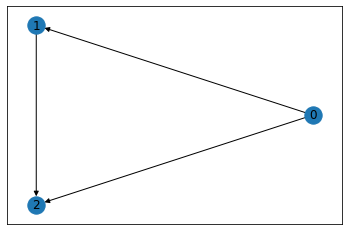

In [59]:
nx.draw_networkx(G, pos=nx.shell_layout(G))

In [60]:
x = tf.placeholder(tf.float64, shape=[None, 1])
t = tf.placeholder(tf.float64, shape=[None, 1])
q = Queue()=
node = 0
q.put(node)
L = np.ones((n, n))
V = dict()
V[node] = x
F = {
    node: lambda x: x,
    n - 1: lambda x: x
}

In [ ]:
input_nodes = [0, 1]

In [61]:
while not q.empty():
    v = q.get()
    if v not in F:
        V[v] = tf.nn.sigmoid(V[v])
        
    for k in nx.neighbors(G, v):
        q.put(k)
        if L[v, k] > 0.0:
            _v = tf.add(tf.matmul(V[v], W[v, k]), B[v, k])
            if k in V:
                V[k] = tf.add(V[k], _v) 
            else:
                V[k] = _v
            L[v, k] = 0.0
        else:
            continue
            
V

{0: <tf.Tensor 'Placeholder_3:0' shape=(?, 1) dtype=float64>,
 1: <tf.Tensor 'Sigmoid_1:0' shape=(?, 1) dtype=float64>,
 2: <tf.Tensor 'Add_12:0' shape=(?, 1) dtype=float64>}

In [63]:
def der(y, x, y_shape: int, x_shape: int):
    ys = tf.split(y, [1] * y_shape, 1)
    def _der(i, j=[]):
        f = ys[i]
        for _j in j:
            fs = tf.gradients(f, x)[0]
            f  = tf.split(fs, [1] * x_shape, 1)[_j]        
        return f
    return _der

In [65]:
y = V[n - 1]
x = V[0]

In [62]:
learning_rate = 0.01
# l = tf.reduce_mean(tf.pow(V[n - 1] - tf.pow(tf.sin(tf.exp(V[0])), 3), 2))
l = tf.reduce_mean(tf.pow(V[n - 1] - 1 / tf.math.bessel_i0(V[0]), 2))

opt = tf.train.AdamOptimizer(learning_rate=learning_rate)
train = opt.minimize(l)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [21]:
losses = []

In [22]:
epochs = 10000
for e in range(epochs):
    
    X = np.random.rand(1000, 1)
    _, loss = sess.run([train, l], feed_dict={
        V[0]: X
    })
    
    losses.append(loss)
    
    if e % 2000 == 0:
        print(loss)

0.556465247157402
0.00017672404055557272
0.00013226784687344806
5.38690782053653e-07
5.74064391441328e-07


In [23]:
# l_classic = losses

In [25]:
import pden
import pden.Net
import pden.Operations
import pden.PDENet

import tensorflow as tf

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from IPython.display import clear_output

%load_ext autoreload
%autoreload 1

%aimport pden.Net
%aimport pden.Operations
%aimport pden.PDENet

In [29]:
k = 16
net = pden.Net.BasicNet(
    pden.Operations.Linear(feature_out=k, feature_in=1, random_init = True),
    pden.Operations.ActivationFunction(tf.nn.tanh),
    pden.Operations.Linear(feature_in=k, feature_out=1, random_init = True)
)

pnet = pden.PDENet.PDENET(net=net)
print(net)

Net 17:
	15	Linear: [1 -> 16]
	17	Activation funciton: <function tanh at 0x13694c170>
	29	Linear: [16 -> 1]


In [30]:
x = tf.placeholder(tf.float64, [None, 1])
y = pnet.forward(x)

In [31]:
pnet = pnet.add_loss(tf.reduce_mean(tf.pow(y - 1 / tf.math.bessel_i0(x), 2)))

In [32]:
learning_rate = 1e-2
training_epochs = 6000
display_step = 250

opt = tf.train.AdamOptimizer(learning_rate = learning_rate)
train = opt.minimize(pnet.loss)

init = tf.global_variables_initializer()

In [33]:
losses = []

In [34]:
sess = tf.Session()
sess.run(init)

for epoch in range(training_epochs):
    
#     P = np.random.uniform(0, 0.5, size=(1,))
    
    X = np.random.rand(100, 1)
    
    _, l = sess.run([train, pnet.loss], feed_dict={
        x: X,
    })
    
    losses.append(l)
    
    if epoch % display_step == 0 and True:
        print(f'Training error for net is "{l}". Epoch {epoch}')
#         X = np.linspace(0, 1, 100)
#         T = np.linspace(0, 1, 100)
#         X, T = np.meshgrid(X, T)

#         clear_output(wait=True)
        
#         plt.plot(X.flatten(), Y.flatten(), '--r', label='Net')
#         plt.plot(X.flatten(), X.flatten() ** 2, '--b', label='Analytical')
#         plt.legend()
#         plt.show()

        
print("Optimization Finished!")

Training error for net is "0.06499848316075335". Epoch 0
Training error for net is "0.00024023859393074948". Epoch 250
Training error for net is "0.00012632856548927746". Epoch 500
Training error for net is "7.029150059505275e-05". Epoch 750
Training error for net is "2.7267413999564914e-05". Epoch 1000
Training error for net is "1.2692560122214217e-05". Epoch 1250
Training error for net is "5.442065635101209e-06". Epoch 1500
Training error for net is "2.3964943050736337e-06". Epoch 1750
Training error for net is "1.053120807576886e-06". Epoch 2000
Training error for net is "2.0475661179716085e-06". Epoch 2250
Training error for net is "6.2015171038054366e-06". Epoch 2500
Training error for net is "5.8124637287520425e-05". Epoch 2750
Training error for net is "5.8045659394981485e-05". Epoch 3000
Training error for net is "2.2216604186895768e-06". Epoch 3250
Training error for net is "8.911961982212305e-08". Epoch 3500
Training error for net is "6.619039434262418e-05". Epoch 3750
Traini

In [35]:
l_graph = losses

In [48]:
xt = np.array(l_classic[:2000:100])
xc = np.array(l_graph[:2000:100])

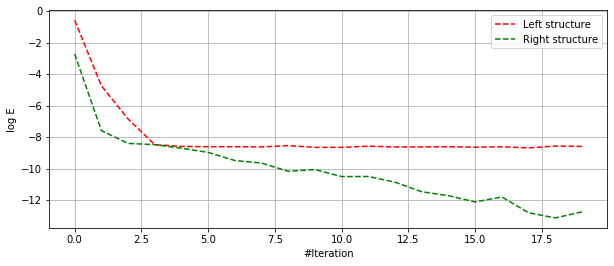

In [52]:
plt.figure(figsize=(10, 4))
plt.plot(np.log(xt), '--r', label='Left structure')
plt.plot(np.log(xc), '--g', label='Right structure')
# plt.plot(np.log(yt), '--y', label=r'$\phi=cos, k = 4$')
# plt.plot(np.log(yc), '--b', label=r'$\phi=cos, k = 16$')
plt.grid()
plt.xlabel('#Iteration')
plt.ylabel('log E')
plt.legend()
plt.show()